In [68]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.types import *
from datetime import datetime
import json

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("sparkSQL exercise") \
            .getOrCreate()

sc = spark.sparkContext 

In [69]:
def apply_json(input_lst):
    try:
        return json.loads(input_lst)['animals'][0]                                               
    except:
        return None 

In [75]:
# data_filepath = '../data/json_dump/output_4994.json'
data_filepath = '../data/one_giant_json.JSON'


data = sc.textFile(data_filepath).map(apply_json) #reads in the json file

In [76]:
print(data)
#create a pipeline to mash dataframes

# df_temp = spark.read.json(data_filepath, multiLine = True)

PythonRDD[157] at RDD at PythonRDD.scala:53


In [77]:
#remove outer dictionary from every file


In [78]:
df = spark.read.json(data_filepath, multiLine = True)

In [79]:
df.count()

1

In [11]:
df.printSchema()

root
 |-- animals: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _links: struct (nullable = true)
 |    |    |    |-- organization: struct (nullable = true)
 |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- self: struct (nullable = true)
 |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- type: struct (nullable = true)
 |    |    |    |    |-- href: string (nullable = true)
 |    |    |-- age: string (nullable = true)
 |    |    |-- attributes: struct (nullable = true)
 |    |    |    |-- declawed: string (nullable = true)
 |    |    |    |-- house_trained: boolean (nullable = true)
 |    |    |    |-- shots_current: boolean (nullable = true)
 |    |    |    |-- spayed_neutered: boolean (nullable = true)
 |    |    |    |-- special_needs: boolean (nullable = true)
 |    |    |-- breeds: struct (nullable = true)
 |    |    |    |-- mixed: boolean (nullable = true)
 |    |    |    |-- primary: stri

In [ ]:
dogs = parts.map(lambda p: Row(id=p[0],
 age=int(p[1].strip())))

In [12]:
df_new = df.select('id', 'age', 'gender', 'primary_photo_cropped', 'status', 'status_changed_at', 'description')

AnalysisException: cannot resolve '`id`' given input columns: [animals, pagination];;
'Project ['id, 'age, 'gender, 'primary_photo_cropped, 'status, 'status_changed_at, 'description]
+- Relation[animals#22,pagination#23] json


In [13]:
dropped_df = df_new.na.drop()

NameError: name 'df_new' is not defined

In [25]:
dropped_df.show()

+--------+------+------+---------------------+---------+--------------------+--------------------+
|      id|   age|gender|primary_photo_cropped|   status|   status_changed_at|         description|
+--------+------+------+---------------------+---------+--------------------+--------------------+
|48504802|  Baby|  Male| [https://dl5zpyw5...|adoptable|2020-07-16T08:28:...|This puppy is sch...|
|48504799|  Baby|  Male| [https://dl5zpyw5...|adoptable|2020-07-16T08:19:...|Meet cute baby Ji...|
|48504797|Senior|  Male| [https://dl5zpyw5...|adoptable|2020-07-16T08:15:...|Primary Color: Br...|
|48504796| Young|  Male| [https://dl5zpyw5...|adoptable|2020-07-16T08:07:...|All of our dogs a...|
+--------+------+------+---------------------+---------+--------------------+--------------------+



In [27]:
dropped_df.printSchema()

root
 |-- id: long (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- primary_photo_cropped: struct (nullable = true)
 |    |-- full: string (nullable = true)
 |    |-- large: string (nullable = true)
 |    |-- medium: string (nullable = true)
 |    |-- small: string (nullable = true)
 |-- status: string (nullable = true)
 |-- status_changed_at: string (nullable = true)
 |-- description: string (nullable = true)



In [28]:
dropped_df.createOrReplaceTempView("dog_data")

In [42]:
result = spark.sql('''SELECT gender,   
                        COUNT(*) AS Number
                        FROM dog_data
                        GROUP BY gender
                        ORDER BY COUNT(*) desc''')
result.show(20)

+------+------+
|gender|Number|
+------+------+
|  Male|     4|
+------+------+



In [43]:
result.head()

Row(gender='Male', Number=4)

In [44]:
plot_gender = result.toPandas()
plot_gender['gender']
plot_gender.dropna(inplace=True)

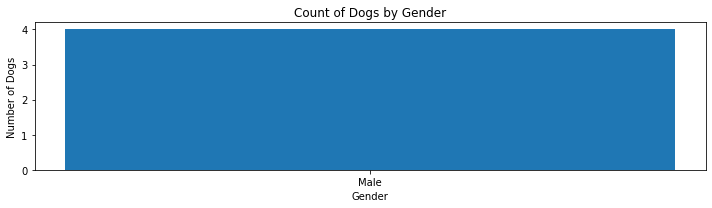

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10,3))
ax.bar(x = plot_gender['gender'], height=plot_gender['Number'])
ax.set_title("Count of Dogs by Gender")

ax.set_xlabel('Gender')
ax.set_ylabel('Number of Dogs')
plt.tight_layout()
plt.show()